In [64]:
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score

In [65]:
df = pd.read_csv('articulos_ml.csv', sep=',')
df

,Title,url,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
0,What is Machine Learning and how do we use it ...,https://blog.signals.network/what-is-machine-l...,1888,1,2.0,2,34,200000
1,10 Companies Using Machine Learning in Cool Ways,NaN,1742,9,NaN,9,5,25000
2,How Artificial Intelligence Is Revolutionizing...,NaN,962,6,0.0,1,10,42000
3,Dbrain and the Blockchain of Artificial Intell...,NaN,1221,3,NaN,2,68,200000
4,Nasa finds entire solar system filled with eig...,NaN,2039,1,104.0,4,131,200000
...,...,...,...,...,...,...,...,...
156,[Log] 83: How Google Uses Machine Learning And...,[Log] 83: http://feedproxy.google.com/~r/Techc...,3239,3,11.0,1,84,3239
157,[Log] 84: Zuck Knows If You've Been Bad Or Goo...,[Log] 84: http://feedproxy.google.com/~r/Techc...,2566,3,8.0,4,85,25019
158,[Log] 85: Microsoft Improves Windows Phone Voi...,[Log] 85: http://feedproxy.google.com/~r/Techc...,2089,4,4.0,1,86,49614
159,[Log] 86: How Google's Acquisition Of DNNresea...,[Log] 86: http://feedproxy.google.com/~r/Techc...,1530,4,12.0,3,87,33660


In [66]:
df = df.drop(['Title', 'url'], 1)
df.shape

(161, 6)

In [67]:
df

,Word count,# of Links,# of comments,# Images video,Elapsed days,# Shares
0,1888,1,2.0,2,34,200000
1,1742,9,NaN,9,5,25000
2,962,6,0.0,1,10,42000
3,1221,3,NaN,2,68,200000
4,2039,1,104.0,4,131,200000
...,...,...,...,...,...,...
156,3239,3,11.0,1,84,3239
157,2566,3,8.0,4,85,25019
158,2089,4,4.0,1,86,49614
159,1530,4,12.0,3,87,33660


In [68]:
# Update null values of a column with column average
for feature in df.columns:
    if df[feature].isna().sum() > 0:
        df[feature] = df[feature].fillna(df[feature].mean())

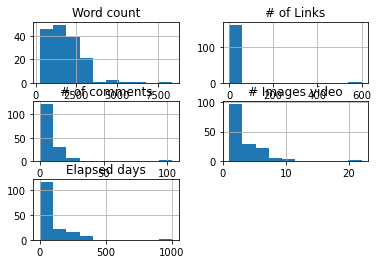

In [69]:
# Histograma
df.drop(['# Shares'], 1).hist()
plt.show()

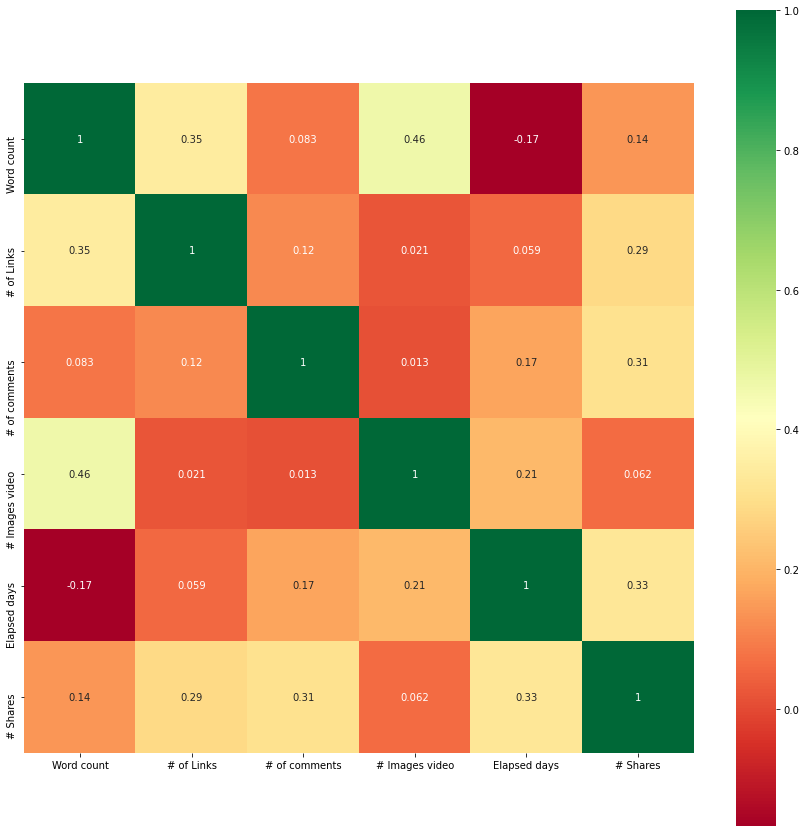

In [70]:
## Correlación de las variables
plt.figure(figsize=(15,15))
p=sns.heatmap(df.corr(method="pearson"), annot=True,cmap='RdYlGn',square=True)

In [71]:
df.columns=['Wordcount','Links','comments','multimedia','Elapseddays','Shares']
df.columns

Index(['Wordcount', 'Links', 'comments', 'multimedia', 'Elapseddays',
       'Shares'],
      dtype='object')

In [72]:
y = pd.DataFrame(df.Shares)
y.shape

(161, 1)

In [73]:
X = pd.DataFrame(df.Wordcount)
X.shape

(161, 1)

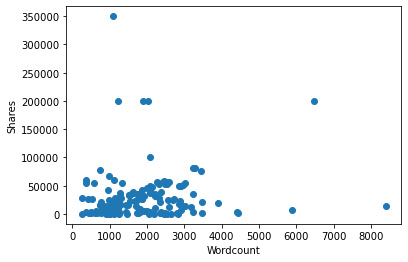

In [74]:
# Graficamos los datos correspondientes
plt.scatter(X, y)
plt.xlabel('Wordcount')
plt.ylabel('Shares')
plt.show()

In [75]:
from sklearn.model_selection import train_test_split
# Se separan los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 29)

In [76]:
X_train = np.array(X_train).reshape(-1,1)
y_train = np.array(y_train).reshape(-1,1)
X_test = np.array(X_test).reshape(-1,1)
y_test = np.array(y_test).reshape(-1,1)

X_train.shape

(128, 1)

In [77]:
# Se define el algoritmo a utilizar
modelo = linear_model.LinearRegression()
# Entrenamiento del modelo
modelo.fit(X_train, y_train)
# Se realiza la predicción
Y_pred = modelo.predict(X_test)

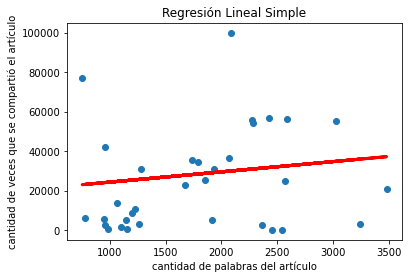

In [78]:
# Grafica los datos junto con el modelo
plt.scatter(X_test, y_test)
plt.plot(X_test, Y_pred, color='red', linewidth=3)
plt.title('Regresión Lineal Simple')
plt.xlabel('cantidad de palabras del artículo')
plt.ylabel('cantidad de veces que se compartió el artículo')
plt.show()

In [79]:
# Evaluación del modelo
print("Score modelo: %.2f" % modelo.score(X_test, y_test))
print("Mean squared error: %.2f" % np.mean((Y_pred - y_test)**2))
print('Coeficiente de determinación: %.2f' % r2_score(y_test, Y_pred))
#print(modelo.score(X_test, y_test))

Score modelo: 0.03
Mean squared error: 612517812.14
Coeficiente de determinación: 0.03


In [80]:
print("Reales:", y_test)
print("Prediciones", Y_pred)

Reales: [[   867]
 [ 14000]
 [ 30912]
 [  3239]
 [ 25019]
 [ 57058]
 [ 42000]
 [  5153]
 [ 36707]
 [  5261]
 [   631]
 [  8707]
 [ 55170]
 [ 56376]
 [  3000]
 [     0]
 [ 54198]
 [ 25548]
 [  2500]
 [ 20880]
 [ 35691]
 [   424]
 [ 11061]
 [ 55738]
 [100000]
 [ 77000]
 [  5956]
 [  1600]
 [ 23018]
 [  6400]
 [ 34515]
 [ 31137]
 [  2958]]
Prediciones [[25220.79066339]
 [24769.25689107]
 [29269.02448415]
 [36052.4111556 ]
 [32559.51197436]
 [31843.28599068]
 [24234.682425  ]
 [25184.46035987]
 [29974.8703811 ]
 [29170.41366031]
 [24369.62355235]
 [25475.10278802]
 [34931.36178985]
 [32694.45310172]
 [25781.31534626]
 [31993.79724812]
 [31085.53966013]
 [28884.96127551]
 [24208.7322082 ]
 [37303.21160535]
 [28277.7262024 ]
 [32434.95093372]
 [25620.4240021 ]
 [31049.20935661]
 [30089.05133502]
 [23149.96336277]
 [24187.97203476]
 [24935.33827859]
 [27929.99329728]
 [23300.4746202 ]
 [28547.60845711]
 [25905.8763869 ]
 [31521.50330237]]


In [81]:
X = df[['Wordcount', 'Links', 'comments']]
X

,Wordcount,Links,comments
0,1888,1,2.000000
1,1742,9,8.782946
2,962,6,0.000000
3,1221,3,8.782946
4,2039,1,104.000000
...,...,...,...
156,3239,3,11.000000
157,2566,3,8.000000
158,2089,4,4.000000
159,1530,4,12.000000


In [82]:
# Se separan los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 29)
# Se entrena y se predice
# Se define el algoritmo a utilizar
modelo = linear_model.LinearRegression()
# Entrenamiento del modelo
modelo.fit(X_train, y_train)
# Se realiza la predicción
Y_pred = modelo.predict(X_test)

In [83]:
# Evaluación del modelo
print("Score del modelo: %.2f" % modelo.score(X_test, y_test))
print("Mean squared error: %.2f" % np.mean((Y_pred - y_test)**2))
print("Coeficiente de determinación: %.2f" % r2_score(y_test, Y_pred))

Score del modelo: 0.11
Mean squared error: 560809186.76
Coeficiente de determinación: 0.11


In [84]:
X = df[['Wordcount', 'multimedia']]
X

,Wordcount,multimedia
0,1888,2
1,1742,9
2,962,1
3,1221,2
4,2039,4
...,...,...
156,3239,1
157,2566,4
158,2089,1
159,1530,3


In [85]:
# Se separan los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 29)
# Se entrena y se predice
# Se define el algoritmo a utilizar
modelo = linear_model.LinearRegression()
# Entrenamiento del modelo
modelo.fit(X_train, y_train)
# Se realiza la predicción
Y_pred = modelo.predict(X_test)

In [86]:
# Evaluación del modelo
print("Score del modelo: %.2f" % modelo.score(X_test, y_test))
print("Mean squared error: %.2f" % np.mean((Y_pred - y_test)**2))
print("Coeficiente de determinación: %.2f" % r2_score(y_test, Y_pred))

Score del modelo: 0.02
Mean squared error: 613935157.49
Coeficiente de determinación: 0.02


### Ahora consideramos todas las características

In [87]:
X = df[['Wordcount', 'Links', 'comments', 'multimedia', 'Elapseddays']]
X

,Wordcount,Links,comments,multimedia,Elapseddays
0,1888,1,2.000000,2,34
1,1742,9,8.782946,9,5
2,962,6,0.000000,1,10
3,1221,3,8.782946,2,68
4,2039,1,104.000000,4,131
...,...,...,...,...,...
156,3239,3,11.000000,1,84
157,2566,3,8.000000,4,85
158,2089,4,4.000000,1,86
159,1530,4,12.000000,3,87


In [88]:
# Se separan los datos de "train" en entrenamiento y prueba para probar los algoritmos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 29)
# Se entrena y se predice
# Se define el algoritmo a utilizar
modelo = linear_model.LinearRegression()
# Entrenamiento del modelo
modelo.fit(X_train, y_train)
# Se realiza la predicción
Y_pred = modelo.predict(X_test)

In [89]:
# Evaluación del modelo
print("Score del modelo: %.2f" % modelo.score(X_test, y_test))
print("Mean squared error: %.2f" % np.mean((Y_pred - y_test)**2))
print("Coeficiente de determinación: %.2f" % r2_score(y_test, Y_pred))

Score del modelo: -0.21
Mean squared error: 761544592.06
Coeficiente de determinación: -0.21
